# Binary XGBoost best and worst external performance

Evaluates the two binary XGBoost models that have the best and worst classification performance for the external datasets. This is BRCA (Breast invasive carcinoma) and COAD (Colon adenocarcinoma) (if you want figures of different cancer types, just change cancer_types). Generates confusion matrices, ROC curves and precision-recall curves.

Generates the files in the figure_folder

In [1]:
cancer_types = ['BRCA', 'COAD']

figure_folder = 'binary_xgboost_external_figs/'

Add the Evaluate module to path and make figure folder:

In [2]:
# adding this path so we can import Evaluate
import sys
import os

cwd = os.getcwd() # get the current path, and only take up to methylation-patterns-izzy (discarding the end bit)
file = 'methylation-patterns-izzy'
end = cwd.find(file) + len(file) + 1 # find start of file in path, add on its lenth to go to the end, and add on 1 to get the /
path = cwd[0:end]
print("path is ", path)
sys.path.append(path)

from Evaluate import load_and_eval
root_path = path

if not (figure_folder.strip('/') in os.listdir()):
    os.mkdir(figure_folder)

path is  /Tank/methylation-patterns-code/methylation-patterns-izzy/


In [3]:
import importlib
import Evaluate
importlib.reload(Evaluate)

<module 'Evaluate' from '/Tank/methylation-patterns-code/methylation-patterns-izzy/Evaluate.py'>

Use the load and eval function for each cancer type:

In [4]:
def Evaluate_external(cancer_type):
    model_path = '../xgboost/saved_models/xgboost_model_' + cancer_type + '.pkl'
    
    folder_dict = {'BRCA' : 'breast_cancer/', 'ESCA': 'Esophageal squamous cell carcinoma (ESCA)/', 'COAD': 'colorectal carcinoma (COAD)/', 'PRAD' : 'prostate CA ICGC/', 'THCA' : 'Thyroid (THCA)/', 'HNSC' : 'Head and neck  squamous cell carcinoma (HNSC)/', 'KIRC' : 'clear cell renal cell carcinoma (KIRC)/', 'LIHC' : 'hepatocellular carcinoma (LIHC)/', 'PRAD2': 'prostate 2/', 'PRAD_meta': 'metastasis/prostate/'}
    folder_name = folder_dict[cancer_type]
    
    # load the data
    import sys
    sys.path.append('/Tank/methylation-patterns-code/methylation-patterns-izzy/')
    from get_train_and_test import get_external_data
    m_values, diagnoses = get_external_data(cancer_type, multiclass = False, remove_inf = True, has_header = False, use_raw = True, root_path = '../new_data/'+folder_name, use_training_imputation = True)
    
    # import model
    import joblib
    model = joblib.load(model_path)
    
    # Evaluate
    from Evaluate import print_evaluation
    print_evaluation(model, m_values, diagnoses, 'xgboost_external_' + cancer_type, cancer_type = cancer_type, save_folder = figure_folder)

    confidence = model.predict_proba(m_values)
    import numpy as np
    num_classes = len(np.unique(diagnoses, axis=0))
    print("num classes is: ", num_classes)

    from Evaluate import plot_curve
    plot_curve('roc', diagnoses, confidence, num_classes, 'xgboost_external_' + cancer_type, cancer_type = cancer_type, save_folder=figure_folder)
    plot_curve('precision_recall', diagnoses, confidence, num_classes, 'xgboost_external_' + cancer_type, cancer_type = cancer_type, save_folder=figure_folder)

for cancer_type in cancer_types:
    Evaluate_external(cancer_type)

Using path  ../new_data/breast_cancer/m_values_from_raw_training_imputation_constant.csv
(57, 277551)
(57,)


/home/in268/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.preprocessing.label module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Acc, conf mat:
0.9824561403508771
[[16  1]
 [ 0 40]]
precision, recall, f1 for each class:
[1.         0.97560976] [0.94117647 1.        ] [0.96969697 0.98765432]
matthews correlation coeficient
0.958238460361173
roc_auc for each class:  [1. 1.]
        name                                    values
0   Accuracy                                  0.982456
1  Precision                  [1.0, 0.975609756097561]
2     Recall                 [0.9411764705882353, 1.0]
3         f1  [0.9696969696969697, 0.9876543209876543]
4        mcc                                  0.958238
5    roc_auc                                [1.0, 1.0]
num classes is:  2
         Normal   BRCA
0.000  0.000000    NaN
0.000  0.058

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
[0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Acc, conf mat:
0.5862068965517241
[[ 8 12]
 [ 0  9]]
precision, recall, f1 for each class:
[1.         0.42857143] [0.4 1. ] [0.57142857 0.6       ]
matthews correlation coeficient
0.41403933560541256
roc_auc for each class:  [0.75833333 0.75833333]
        name                                    values
0   Accuracy                                  0.586207
1  Precision                [1.0, 0.42857142857142855]
2     Recall                                [0.4, 1.0]
3         f1                 [0.5714285714285715, 0.6]
4        mcc                                  0.414039
5    roc_auc  [0.7583333333333333, 0.7583333333333333]
num classes is:  2
          Normal      COAD
0.000000    0.00       NaN
0.000000    0.05       NaN
0.000000    0.35       NaN
0.000000    0.40       NaN
0.111111    0.40       NaN
0.111111    0.50       NaN
0.22222

In [8]:
# getting pr and roc auc bar plots:
import sys
sys.path.append('/Tank/methylation-patterns-code/methylation-patterns-izzy/')
from get_train_and_test import get_external_data
    
cancer_types_external = ['BRCA', 'COAD', 'ESCA', 'ESCA2', 'HNSC', 'KIRC', 'LIHC', 'PRAD', 'THCA']
cancer_types_all_cancer = ['HNSC', 'LIHC', 'PRAD'] # these are only cancer so the roc curve can't be found

folder_dict = {'BRCA' : 'breast_cancer/', 'ESCA': 'Esophageal squamous cell carcinoma (ESCA)/', 'ESCA2': 'ESCA_from_Ganesh/', 'COAD': 'colorectal carcinoma (COAD)/', 'PRAD' : 'prostate CA ICGC/', 'THCA' : 'Thyroid (THCA)/', 'HNSC' : 'Head and neck  squamous cell carcinoma (HNSC)/', 'KIRC' : 'clear cell renal cell carcinoma (KIRC)/', 'LIHC' : 'hepatocellular carcinoma (LIHC)/', 'PRAD2': 'prostate 2/', 'PRAD_meta': 'metastasis/prostate/'}
auc_0s = []
auc_1s = []
roc_aucs = []

import Evaluate
from Evaluate import get_pr_auc, get_roc_auc
for cancer_type in cancer_types_external:
#     auc_0, auc_1 = get_pr_auc(cancer_type, '../xgboost/figs/metrics_xgboost_' + cancer_type + '.csv', model_path = '', Xtest = None, ytest = None)
    
    import joblib
    if cancer_type == 'ESCA2':
        model = joblib.load('../xgboost/saved_models/xgboost_model_ESCA.pkl')
    else:
        model = joblib.load('../xgboost/saved_models/xgboost_model_' + cancer_type + '.pkl')
    
    folder_name = folder_dict[cancer_type]
    
    if cancer_type == 'ESCA2':
        metrics_path = '../new_data/' + folder_name + 'figs/metrics_GSE72874_xgboost_binary.csv'
    else:
        metrics_path = '../new_data/' + folder_name + 'figs/metrics_xgboost_binary_training_imputation_constant.csv'
    
    from Evaluate import get_pr_auc, get_roc_auc
    try: # quickly do a first try without getting data: (for if we already have it stored in metrics)
        auc_0, auc_1 = get_pr_auc(cancer_type, metrics_path, model_path = '', Xtest = None, ytest = None)
        
    except:
        if cancer_type == 'ESCA2':
            Xtest, ytest = get_external_data(cancer_type, multiclass = False, remove_inf = True, has_header = False, use_raw = False, root_path = '../new_data/'+folder_name, use_training_imputation = False)
        elif cancer_type == 'THCA':
            Xtest, ytest = get_external_data(cancer_type, multiclass = False, remove_inf = True, has_header = False, use_raw = False, root_path = '../new_data/'+folder_name, use_training_imputation = True)
        else:
            Xtest, ytest = get_external_data(cancer_type, multiclass = False, remove_inf = True, has_header = False, use_raw = True, root_path = '../new_data/'+folder_name, use_training_imputation = True)

        diagnoses_test = ytest
        predictions_one_hot = model.predict_proba(Xtest)

        auc_0, auc_1 = get_pr_auc(cancer_type, metrics_path, model_path = '../xgboost/saved_models/xgboost_model_' + cancer_type + '.pkl', Xtest = Xtest, ytest = ytest)
        
    auc_0s.append(auc_0)
    auc_1s.append(auc_1)
    
    if not (cancer_type in cancer_types_all_cancer): # if there are normal samples available we have a roc stat
        roc_auc = get_roc_auc(cancer_type, metrics_path)
        roc_aucs.append(roc_auc)
    else: # in the three cases where this is True (PRAD, LIHC, HNSC), all cancer samples are classified correctly as cancer. So the ROC curve cannot be computed 
        import numpy as np
        roc_aucs.append(np.nan)
    
    

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


 Can just quote:  ['1.0', '1.0']
 Can just quote:  ['0.886926228774606', '0.5402589739599544']
 Can just quote:  ['1.0', '1.0']
 Can just quote:  ['0.9415466568403369', '0.9784381779692856']
 Can just quote:  ['nan', '1.0']
 Can just quote:  ['0.9971011863444185', '0.9964938585886505']
 Can just quote:  ['nan', '1.0']
 Can just quote:  ['nan', '1.0']
 Can just quote:  ['0.9169740482543043', '0.9706197225506844']


In [28]:
# average the two ESCA datasets (using macro average)
esca_index = np.where(np.array(cancer_types_external) == 'ESCA')[0][0]
esca2_index = np.where(np.array(cancer_types_external) == 'ESCA2')[0][0]
esca_index
esca2_index
# work out average:
auc_0s_av = (auc_0s[esca_index] + auc_0s[esca2_index])/2
auc_1s_av = (auc_1s[esca_index] + auc_1s[esca2_index])/2
roc_aucs_av = (roc_aucs[esca_index] + roc_aucs[esca2_index])/2
# put average in esca_index
auc_0s[esca_index] = auc_0s_av
auc_1s[esca_index] = auc_1s_av
roc_aucs[esca_index] = roc_aucs_av
# remove esca2_index
del auc_0s[esca2_index]
del auc_1s[esca2_index]
del roc_aucs[esca2_index]
del cancer_types_external[esca2_index]

2

3

In [29]:
auc_0s
auc_1s
roc_aucs

[1.0,
 0.886926228774606,
 0.9707733284201685,
 nan,
 0.9971011863444185,
 nan,
 nan,
 0.9169740482543043]

[1.0,
 0.5402589739599544,
 0.9892190889846428,
 1.0,
 0.9964938585886505,
 1.0,
 1.0,
 0.9706197225506844]

[1.0, 0.75833333, 0.9820800000000001, nan, 0.99669187, nan, nan, 0.95905607]

<module 'Evaluate' from '/Tank/methylation-patterns-code/methylation-patterns-izzy/Evaluate.py'>

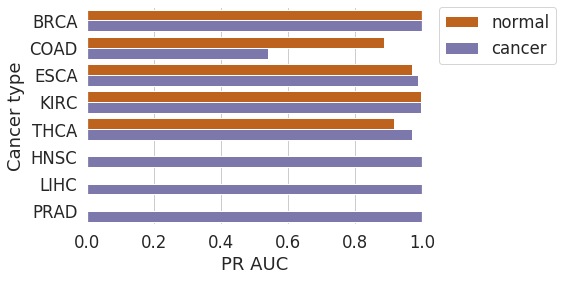

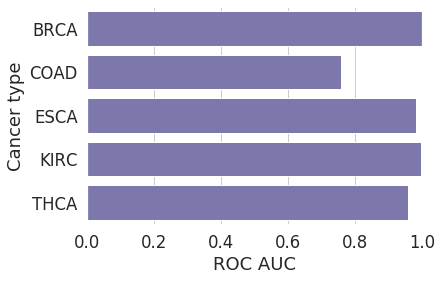

In [32]:
# plot them:
import importlib
import Evaluate
importlib.reload(Evaluate)

from Evaluate import plot_pr_and_roc_auc_bars
plot_pr_and_roc_auc_bars(cancer_types_external, auc_0s, auc_1s, roc_aucs, figure_folder + 'PR_bar_plot_xgboost_binary_external.svg', figure_folder+ 'ROC_bar_plot_xgboost_binary_external.svg')
